# Heart Failure Prediction Dataset

## Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Atribute Information

- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

In [146]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [147]:
df = pd.read_csv('heart.csv')

In [148]:
# look at dataset
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [149]:
# columns as list
columns = list(df.columns)
columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [150]:
# main info about dataset
print('Dataset has shape:', df.shape)
print('Total nans in dataset:', df.isna().sum().sum())

Dataset has shape: (918, 12)
Total nans in dataset: 0


We have 0 missing values in data, so we dont need to delete any data

In [151]:
# Datatypes in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Descriptive Statistical Analysis

In [152]:
# Descriptive Statistical info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


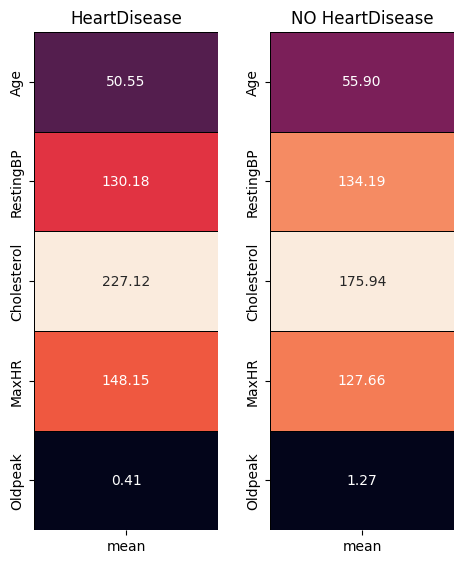

In [153]:
# Lets compare means for every numerical column depending on target (HeartDisease)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 6))
num_cols = list(df.describe().columns)
num_cols.remove('HeartDisease')
num_cols.remove('FastingBS')
plt.subplot(1, 2, 1)
sns.heatmap(data = df[df.HeartDisease == 0][num_cols].describe().T[['mean']], annot = True
            ,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('HeartDisease')

plt.subplot(1, 2, 2)
sns.heatmap(data = df[df.HeartDisease == 1][num_cols].describe().T[['mean']], annot = True
            ,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('NO HeartDisease')

fig.tight_layout(pad = 2)

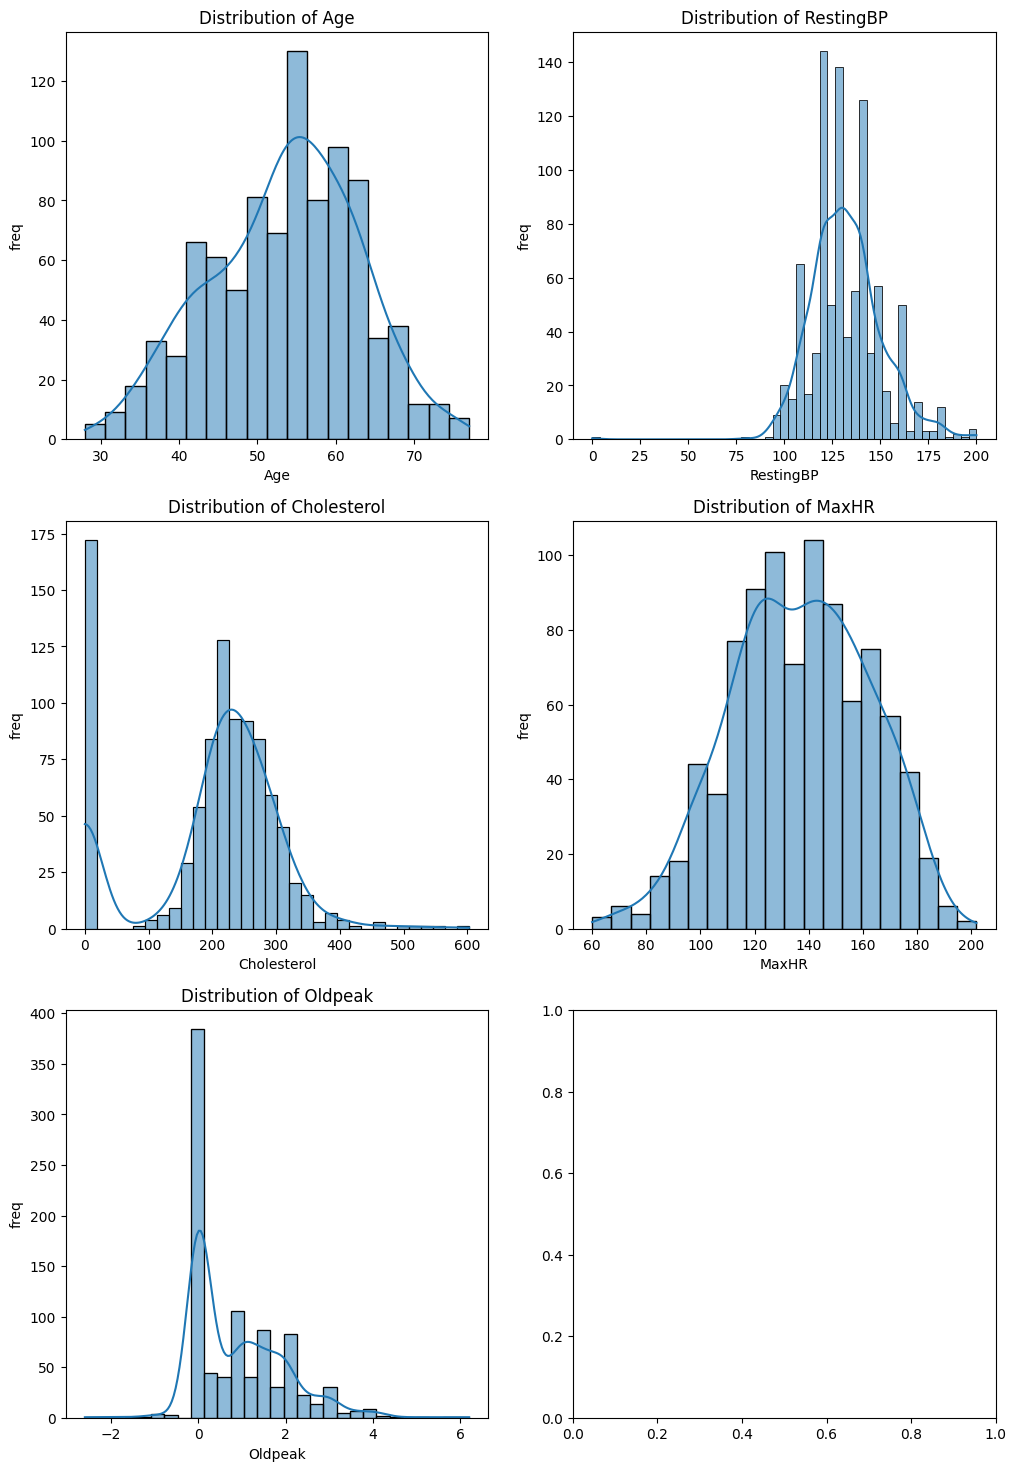

In [154]:
# plot distribution for each numerical column
# it will also include histograms of density
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 18))
for col in range(len(num_cols)):
    plt.subplot(3, 2, col+1)
    sns.histplot(data = df, x = num_cols[col], kde= True)
    plt.xlabel(num_cols[col])
    plt.ylabel('freq')
    plt.title(f'Distribution of {num_cols[col]}')

We can see, that **Cholesterol** column has a lot of **outliners** at value 0, we might get rid of it later.

In [155]:
categorical_cols = list(df.columns)
for i in num_cols:
    categorical_cols.remove(i)
categorical_cols.remove('HeartDisease')

In [156]:
categorical_cols

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

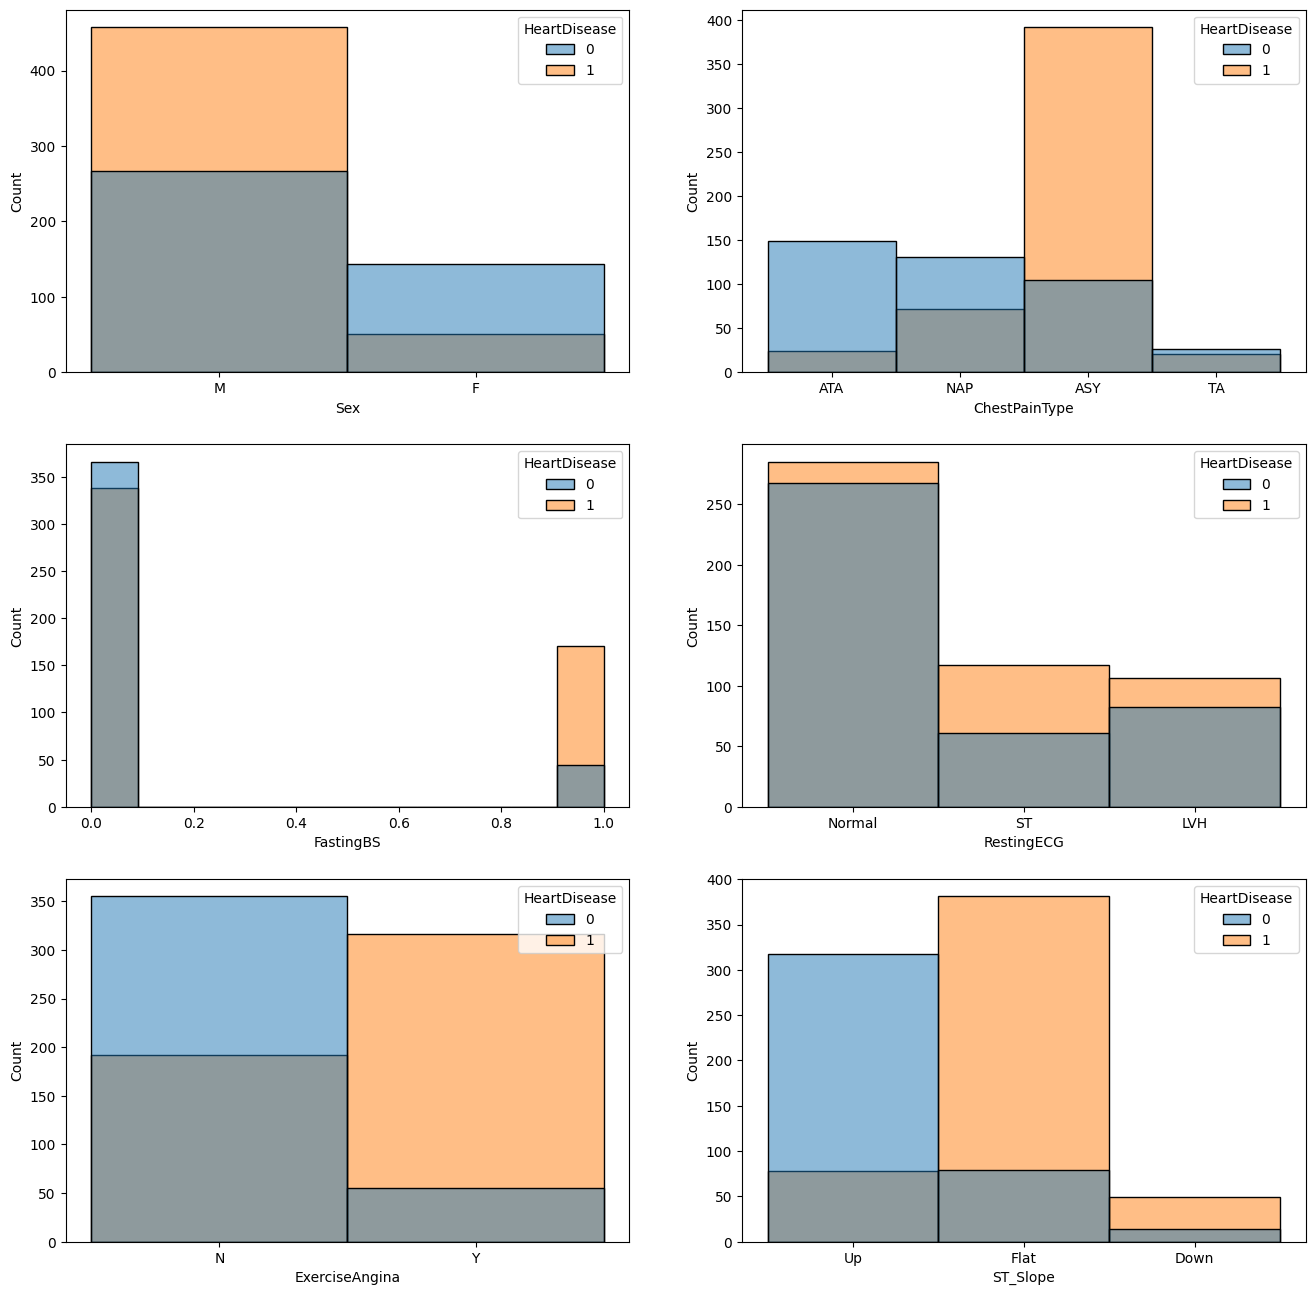

In [157]:
# plot categorical columns distribution
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (16, 16))
for col in range(len(categorical_cols)):
    plt.subplot(3, 2, col+1)
    sns.histplot(data = df, x = categorical_cols[col], color = 'mediumseagreen', hue = 'HeartDisease')

On many charts, we see a **strong deviation** in favor of **target value**. <br>
Columns with such deviation can be very usefull in future classification model

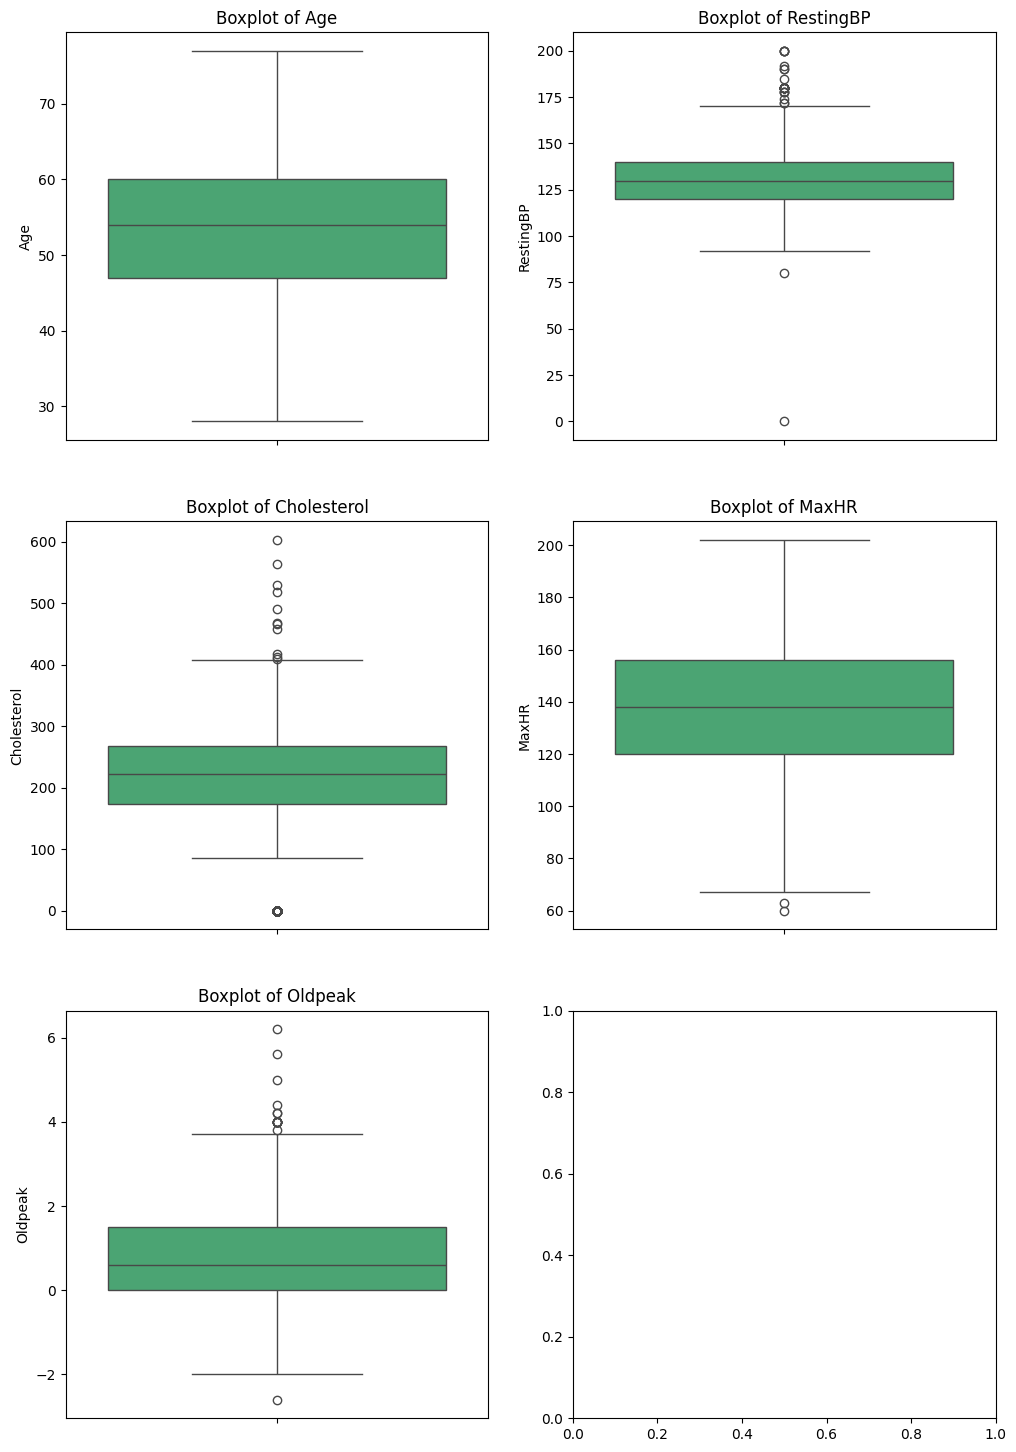

In [158]:
# plot boxplot for each numerical column
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 18))
for col in range(len(num_cols)):
    plt.subplot(3, 2, col+1)
    sns.boxplot(data = df, y = num_cols[col], color = 'mediumseagreen')
    plt.ylabel(num_cols[col])
    plt.title(f'Boxplot of {num_cols[col]}')

On these boxplots we can see: **median**, **25 and 75 quantiles**, **max and min values** and **outliners**. <br>
Some features has a lot **outliners** above max value.

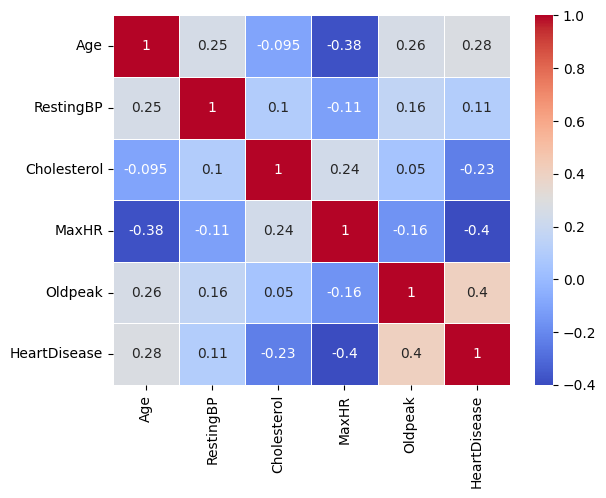

In [159]:
# plot correlation plot for numerical features
corr = df[num_cols + ['HeartDisease']].corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5);

The highest correlations are -0.4 and 0.4 between *MaxHR*, *Oldpeak* and target value - *HeartDisease* <br>
We can assume that these features are the most usefull in classification

In [160]:
df['Sex'].value_counts(normalize = True)

Sex
M    0.78976
F    0.21024
Name: proportion, dtype: float64

In [161]:
df['Sex'].value_counts(normalize = True).values.tolist()

[0.789760348583878, 0.210239651416122]

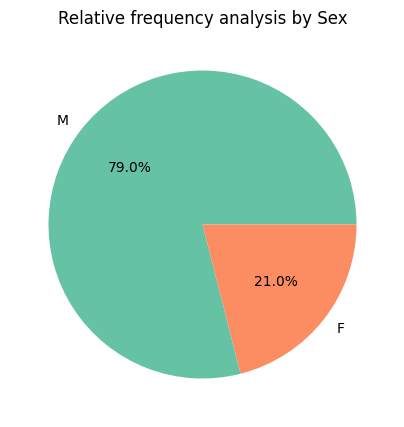

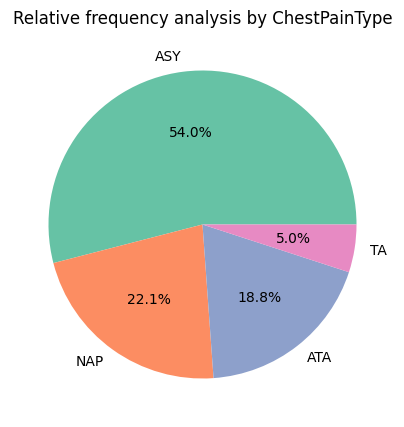

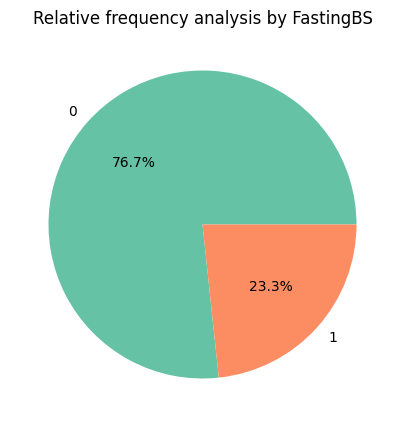

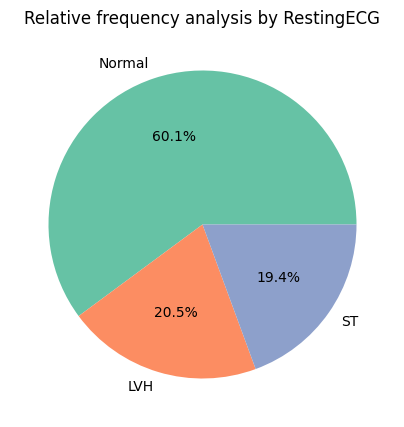

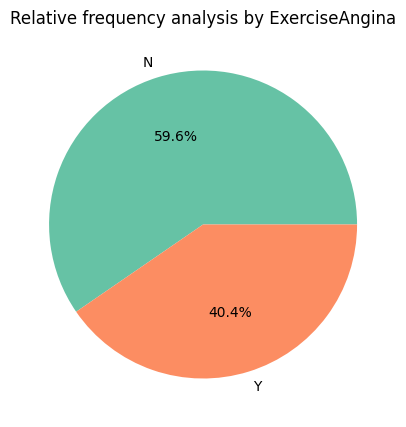

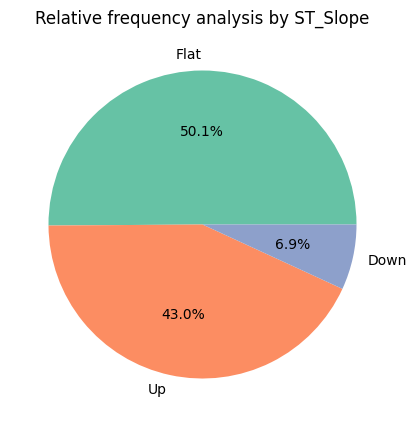

In [162]:
# plot pie charts with relative frequencies for all categorical feature
for i in range(len(categorical_cols)):
    fig = plt.figure(figsize = (5, 5))
    plt.pie(df[categorical_cols[i]].value_counts(normalize = True).values.tolist(), labels = df[categorical_cols[i]].value_counts(normalize = True).index.tolist(), autopct='%1.1f%%', colors = sns.color_palette("Set2"))
    plt.title("Relative frequency analysis by " + categorical_cols[i])
    plt.show()

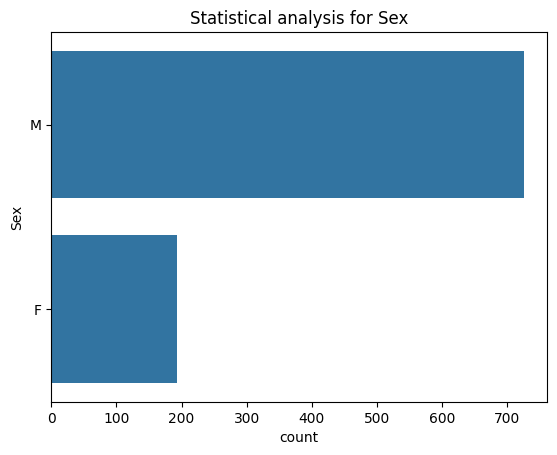

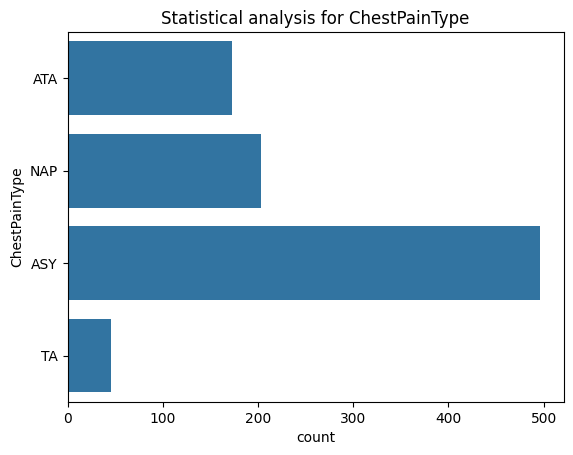

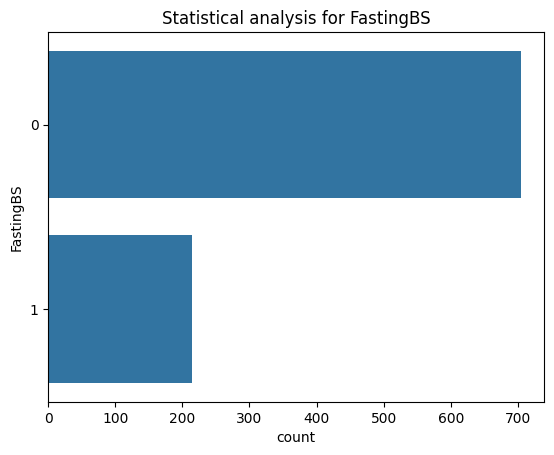

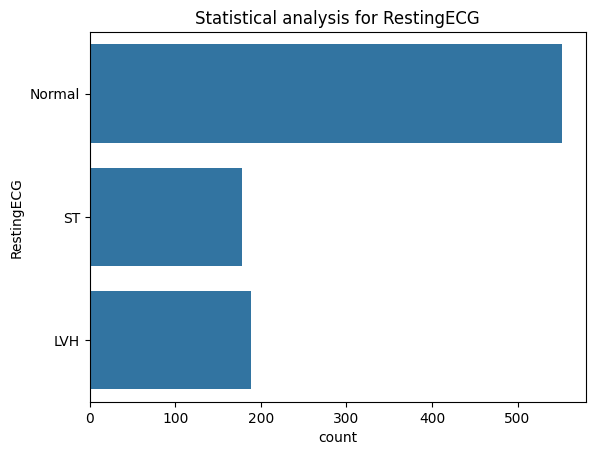

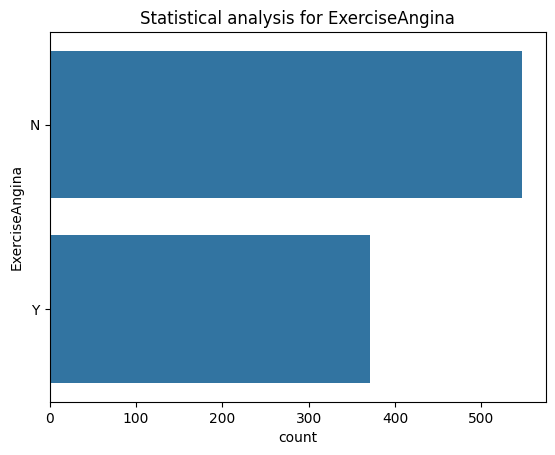

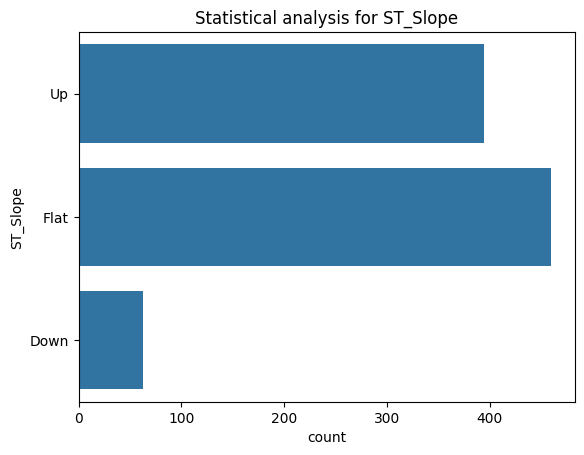

In [163]:
# statistical analysis for each categorical column
for col in categorical_cols:
    sns.countplot(data = df, y = col)
    #fig = plt.figure(figsize = (5, 5))
    plt.title('Statistical analysis for '+col)
    plt.show()

Each value for the categorical variables in my dataset occurs **fairly frequently**, with only a few categories having a notably low number of instances.

In [164]:
# for each numerical column print num of outliners
# lets assume 2 std as borders for outliner
for col in num_cols:
    print(f'Percentage of outliners for \033[1m {col}\033[0m')
    print(f'#outline samples = {len(df[(df[col] < (df[col].mean() - 2 * df[col].var())) | (df[col] > (df[col].mean() + 2 * df[col].var()))])}')
    print(f'#percent of samples = {len(df[(df[col] < (df[col].mean() - 2 * df[col].var())) | (df[col] > (df[col].mean() + 2 * df[col].var()))]) / len(df)}')

Percentage of outliners for  Age
#outline samples = 0
#percent of samples = 0.0
Percentage of outliners for  RestingBP
#outline samples = 0
#percent of samples = 0.0
Percentage of outliners for  Cholesterol
#outline samples = 0
#percent of samples = 0.0
Percentage of outliners for  MaxHR
#outline samples = 0
#percent of samples = 0.0
Percentage of outliners for  Oldpeak
#outline samples = 30
#percent of samples = 0.032679738562091505


We have a little outliners for each column

**Statistical Analysis for subgroups**

In [165]:
# create groups organized by Sex and HeartDisease
grouped = df.groupby(['Sex', 'HeartDisease'], as_index = False).size()
grouped

,Sex,HeartDisease,size
0,F,0,143
1,F,1,50
2,M,0,267
3,M,1,458


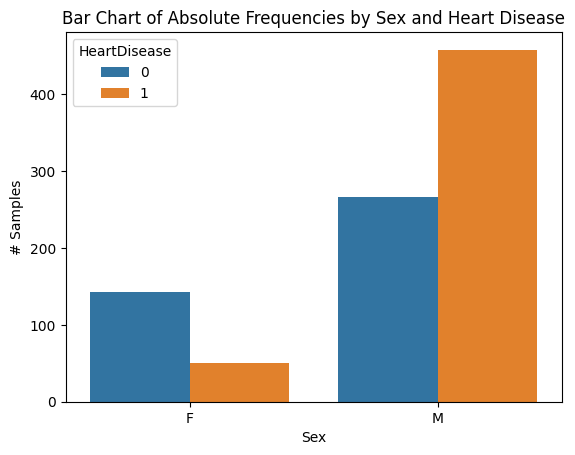

In [166]:
# plot absolute frequencies for groups
sns.barplot(grouped, x = 'Sex', y = 'size', hue = 'HeartDisease')
plt.title('Bar Chart of Absolute Frequencies by Sex and Heart Disease')
plt.ylabel('# Samples');

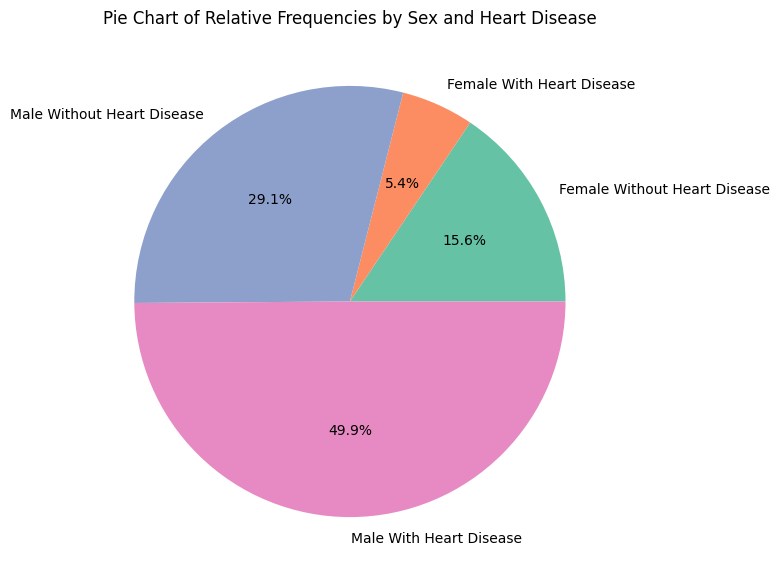

In [167]:
# plot pie chart for group
fig = plt.figure(figsize = (7, 7))
labels = grouped['Sex'].apply(lambda x: 'Female' if x == 'F' else 'Male') + grouped['HeartDisease'].apply(lambda x: ' With ' if x == 1 else ' Without ' ) + 'Heart Disease'
sizes = grouped['size']
plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors = sns.color_palette("Set2"))
plt.title('Pie Chart of Relative Frequencies by Sex and Heart Disease');